In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal, getcontext

pathToProject = '..//data//'

files_legendre_cos = [
    'legendre_cos.csv', 
    'legendre_cos_omp.csv', 
]
files_legendre_sin = [
    'legendre_sin.csv', 
    'legendre_sin_omp.csv', 
]
files_legendre = files_legendre_cos + files_legendre_sin

files_chebyshev_sin = [
    'chebyshev_sin.csv',
    'chebyshev_sin_omp.csv',
]
files_chebyshev_cos = [
    'chebyshev_cos.csv',
    'chebyshev_cos_omp.csv',
]
files_chebyshev = files_chebyshev_cos + files_chebyshev_sin

files_sin = [
    'taylor_sin.csv', 
] + files_legendre_sin + files_chebyshev_sin


files_cos = [
    'taylor_cos.csv', 
] + files_legendre_cos + files_chebyshev_cos

getcontext().prec = 500

In [2]:
def createPlotStepAndResult(files):
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    styles = ['-.', ':', '-.', ':']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    txt = ['а', 'б', 'в', 'г', 'д']
    
    for idx, file in enumerate(files):
        data = pd.read_csv(pathToProject + file, converters={'differense': lambda x: Decimal(x)}, delimiter=';', nrows=100)
        data['differense'] = data['differense'].apply(lambda x: np.log10(x) if x > 0 else np.nan) 
        style = styles[idx % len(styles)]
        color = colors[idx % len(colors)]
        label = txt[idx]
        ax.plot(data['step'], data['differense'], linestyle=style, color=color, label=file[:-4])
    
    ax.set_ylabel('Ошибка приближения, ULP', fontsize=14)
    ax.set_xlabel('Степень полинома', fontsize=20)
    ax.grid(True)

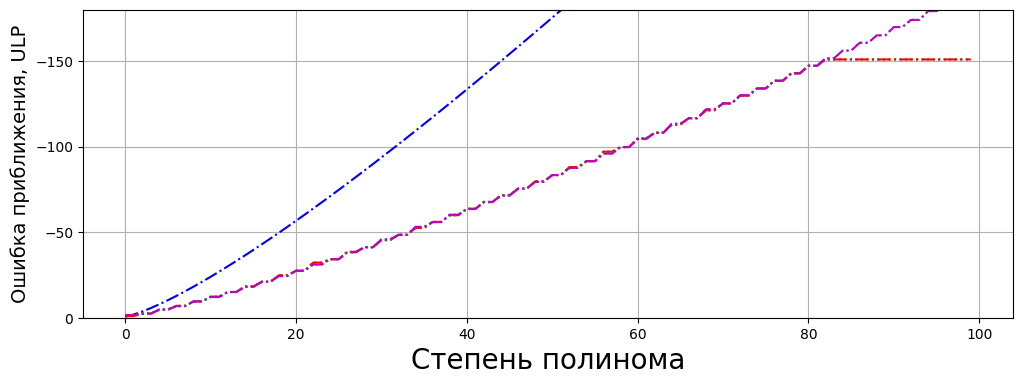

In [3]:
createPlotStepAndResult(files_cos)
plt.ylim(0, -180)
plt.show()

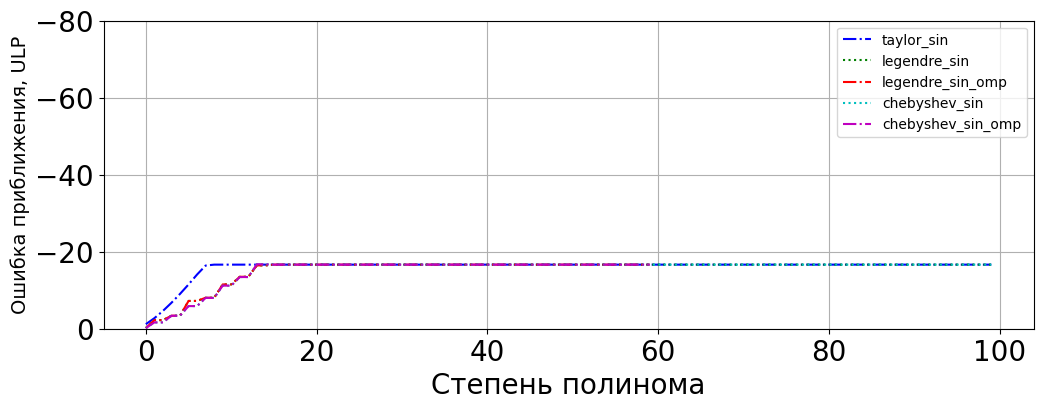

In [4]:
createPlotStepAndResult(files_sin)
plt.legend(loc='best')
plt.ylim(0, -80)
plt.show()

In [5]:
def createPlotStepAndTime(files):
    fig, ax = plt.subplots(figsize=(14, 6))
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.style.use('default')
    
    styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'h', 'H']
    txt = ['а', 'б', 'в', 'г', 'д']
    
    for idx, file in enumerate(files):
        data = pd.read_csv(pathToProject + file, converters={'differense': lambda x: Decimal(x)}, delimiter=';', nrows=100)
        style = styles[idx % len(styles)]
        marker = markers[idx % len(markers)]
        label = txt[idx]
        ax.plot(data['step'], data['time'], linestyle=style)
        ax.text(data['step'].iloc[-1], data['time'].iloc[-1], label, fontsize=16, verticalalignment='bottom', horizontalalignment='right')
        print(txt[idx] + ") " + file[:-4])

    ax.set_ylabel('Время, с', fontsize=20)
    ax.set_xlabel('Степень полинома', fontsize=20)
    ax.grid(True)

а) taylor_cos
б) legendre_cos
в) legendre_cos_omp
г) chebyshev_cos
д) chebyshev_cos_omp


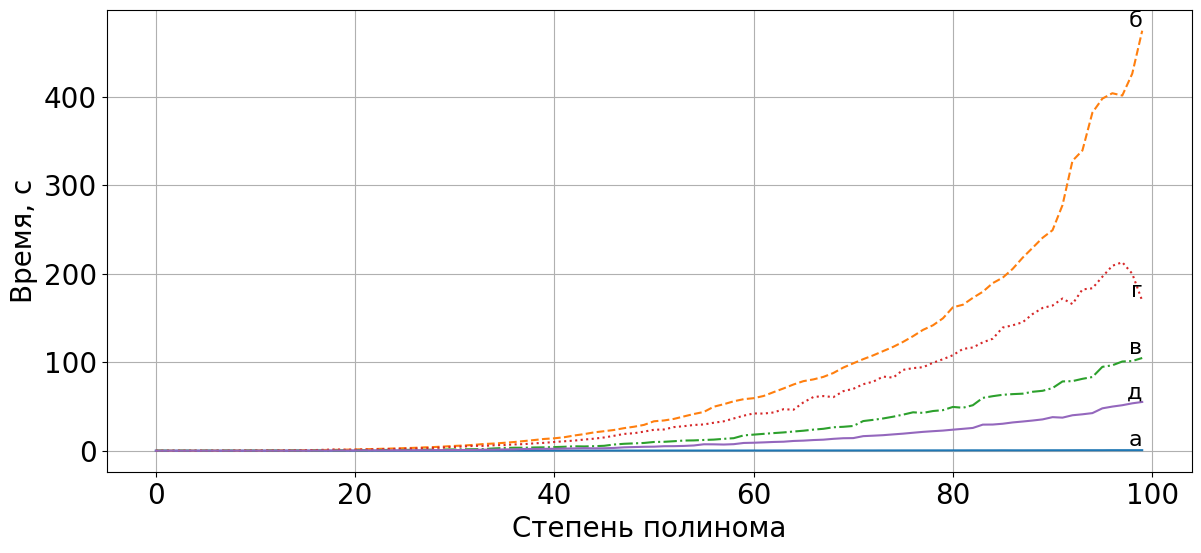

In [6]:
createPlotStepAndTime(files_cos)
plt.show()

а) taylor_sin
б) legendre_sin
в) legendre_sin_omp
г) chebyshev_sin
д) chebyshev_sin_omp


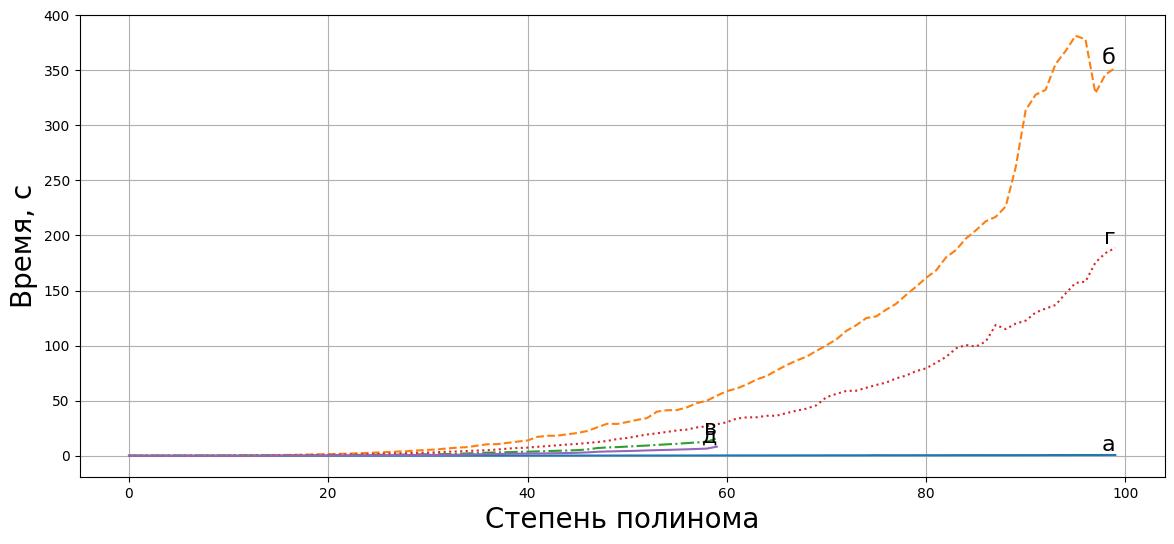

In [7]:
createPlotStepAndTime(files_sin)
plt.show()

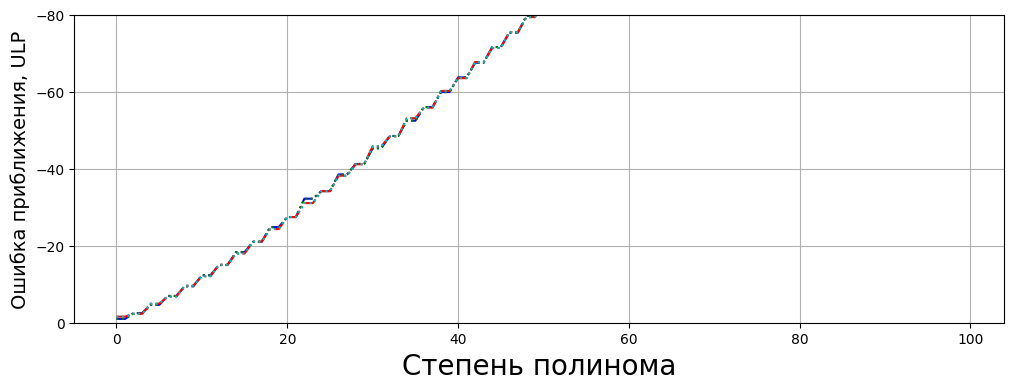

а) legendre_cos
б) legendre_cos_omp
в) chebyshev_cos
г) chebyshev_cos_omp


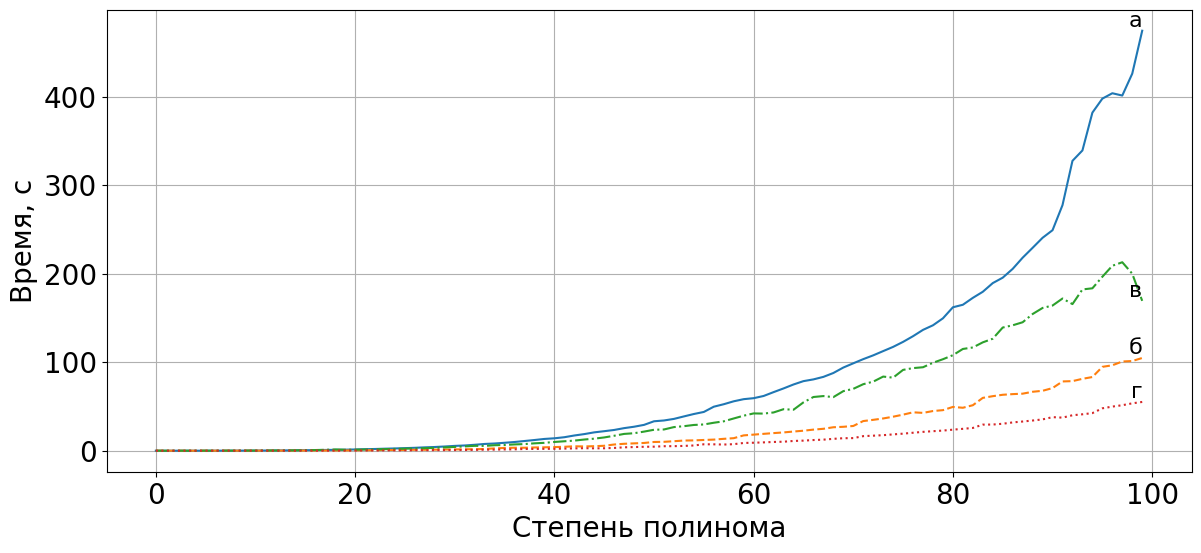

In [8]:
createPlotStepAndResult(files_legendre_cos + files_chebyshev_cos)
plt.ylim(0, -80)
plt.show()

createPlotStepAndTime(files_legendre_cos + files_chebyshev_cos)
plt.show()

In [18]:
def createPlotDifferenseByStepAndTime(files):
    
    if len(files) != 2:
        raise ValueError("Ожидается ровно два файла для сравнения.")
    
    fig, ax = plt.subplots(figsize=(14, 4))
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.style.use('default')
    
    data1 = pd.read_csv(pathToProject + files[0], converters={'differense': lambda x: Decimal(x)}, delimiter=';', nrows=100)
    data2 = pd.read_csv(pathToProject + files[1], converters={'differense': lambda x: Decimal(x)}, delimiter=';', nrows=100)

    if not all(data1['step'] == data2['step']):
        raise ValueError("Оба файла должны иметь одинаковые значения 'step'.")

    time_ratio = data1['time'] / data2['time']

    ax.plot(data1['step'], time_ratio, linestyle='-', marker='o', color='b')

    ax.set_ylabel('Ускорение', fontsize=20)
    ax.set_xlabel('Степень полинома', fontsize=20)
    ax.grid(True)

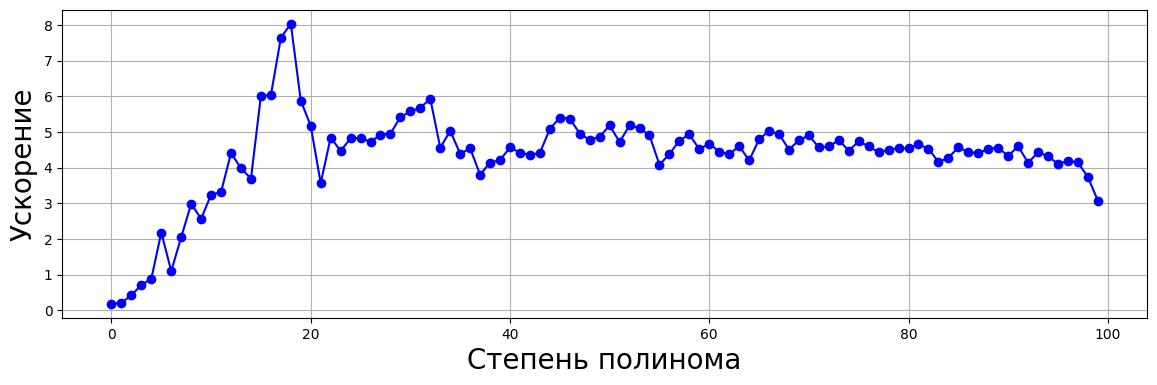

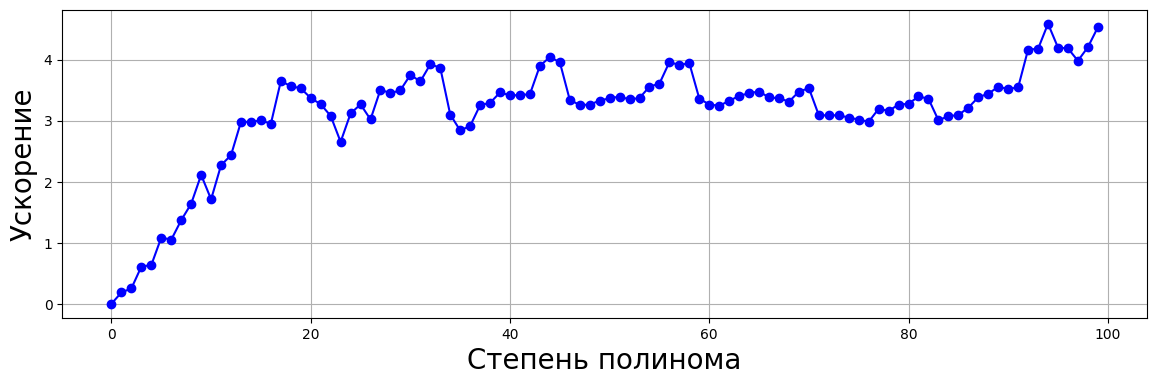

In [19]:
createPlotDifferenseByStepAndTime(files_chebyshev_cos)
createPlotDifferenseByStepAndTime(files_legendre_cos)

In [15]:
def createPlotTimeAndAccuracy(files):
    fig, ax = plt.subplots(figsize=(14, 6))
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.style.use('default')
    
    styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'h', 'H']
    txt = ['а', 'б', 'в', 'г', 'д']
    
    for idx, file in enumerate(files):
        data = pd.read_csv(pathToProject + file, converters={'differense': lambda x: Decimal(x)}, delimiter=';', nrows=90)
        style = styles[idx % len(styles)]
        marker = markers[idx % len(markers)]
        label = txt[idx]
        ax.plot(data['time'], data['differense'], linestyle=style)
        ax.text(data['time'].iloc[-1], data['differense'].iloc[-1], label, fontsize=16, verticalalignment='bottom', horizontalalignment='right')
        print(txt[idx] + ") " + file[:-4])
        
    plt.yscale('log')
    plt.ylim(1,10e-180)
    ax.set_ylabel('Ошибка приближения, ULP', fontsize=14)
    ax.set_xlabel('Время, с', fontsize=20)
    ax.grid(True)

а) chebyshev_cos
б) chebyshev_cos_omp


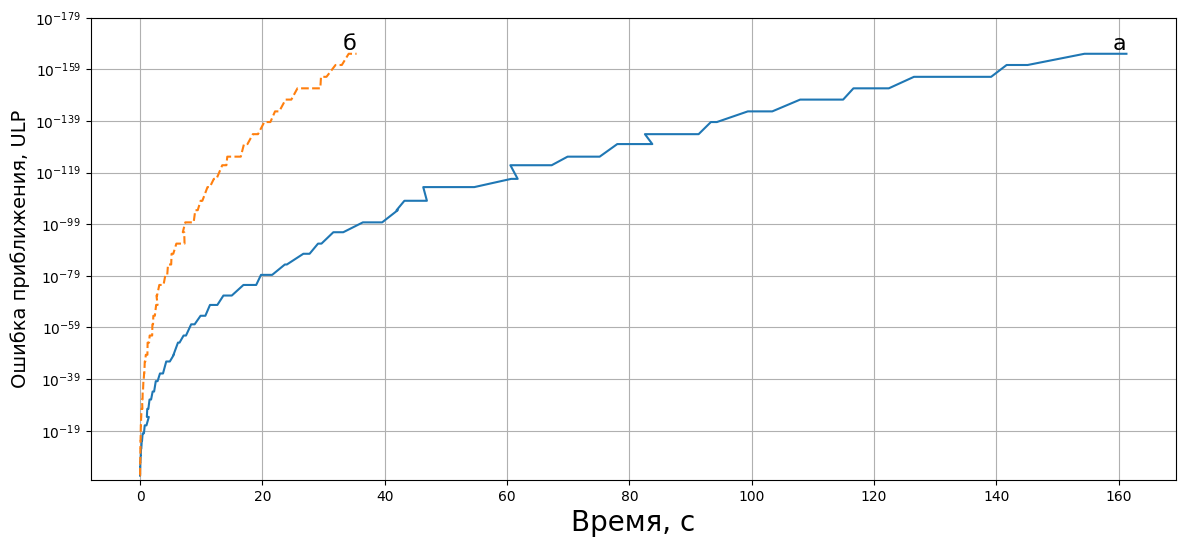

In [16]:
createPlotTimeAndAccuracy(files_chebyshev_cos)

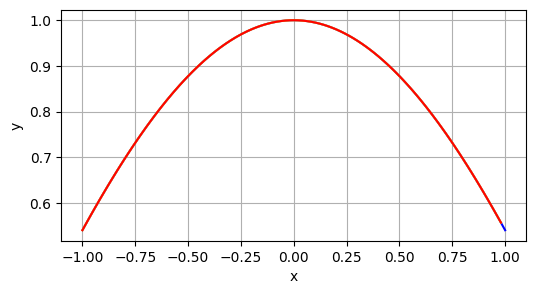

In [13]:
converter = {'differense': lambda x: Decimal(x), 'result': lambda x: Decimal(x), 'x': lambda x: Decimal(x)}
data1 = pd.read_csv(pathToProject + 'approx_cheb_cos.csv', delimiter=';', converters=converter)
data2 = pd.read_csv(pathToProject + 'approx_legendre_cos.csv', delimiter=';', converters=converter)

x = np.linspace(-1, 1, 400)
cos_values = np.cos(x)

plt.figure(figsize=(6, 3))
plt.plot(x, cos_values, label='cos(x)', color='blue')
plt.plot(data1['x'], data1['result'], color='red', zorder=5)
plt.plot(data2['x'], data2['result'], color='yellow', zorder=4)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
